Notes for publication quality figures using gLucifer
=====

Last updated 21 April 2016

Related to this [github ticket](https://github.com/underworldcode/underworld2/issues/87), although many of the issues in that post have already been fixed.

In [26]:
import underworld as uw
import glucifer
import numpy as np


**Make a minimal mesh and mesh variable for testing**

In [27]:
mesh = uw.mesh.FeMesh_Cartesian( elementType = ("Q1/dQ0"), 
                                 elementRes  = (16, 16), 
                                 minCoord    = (0., 0.), 
                                 maxCoord    = (1., 1.))
velocityField = uw.mesh.MeshVariable( mesh=mesh, nodeDofCount=2 )

Example 1: Ease of use
----

Not obvious how to change parameters, specifically:

1. title font size and font type
2. the axis tick number font size
3. x/y axis labels
4. changing swarm particle/vector arrow colours

Main point:
-----

We need some way to list/expose all the parameters we can edit without needing to break open the code.

In [28]:
velocityField.data[...] = (0.0, 0.0)

In [29]:
swarm = uw.swarm.Swarm( mesh=mesh )
particleCoordinates = np.zeros((1,2))
particleCoordinates[0] = (0.5, 0.5)
swarm.add_particles_with_coordinates(particleCoordinates)

array([0], dtype=int32)


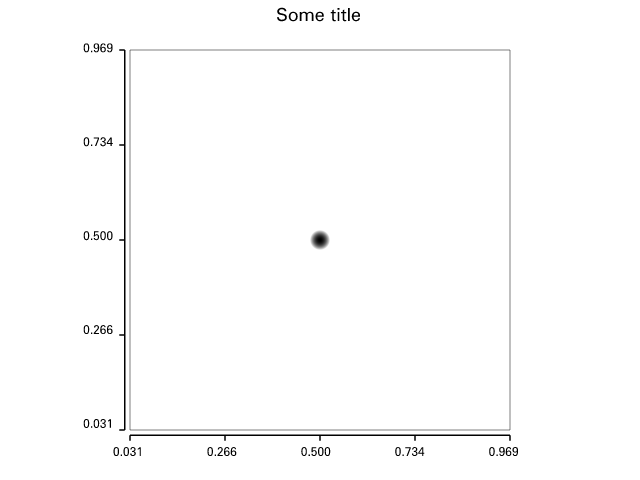

In [31]:
imageTitle = "Some title"
propertyList = {"margin" : 50, "rulers" : True, "rulerticks" : 5, "tick3" : 0.0}
fig = glucifer.Figure(title=imageTitle, properties=propertyList, quality=3)
vArrows = glucifer.objects.VectorArrows( mesh, velocityField, arrowHead=0.2, scaling=1.0)
sParts = glucifer.objects.Points(swarm, colourBar=False, pointSize=20.0) 
fig.append(sParts)
fig.append(vArrows)
fig.show()

Minor issue with clipping in some numbers; e.g. colour bar labels.


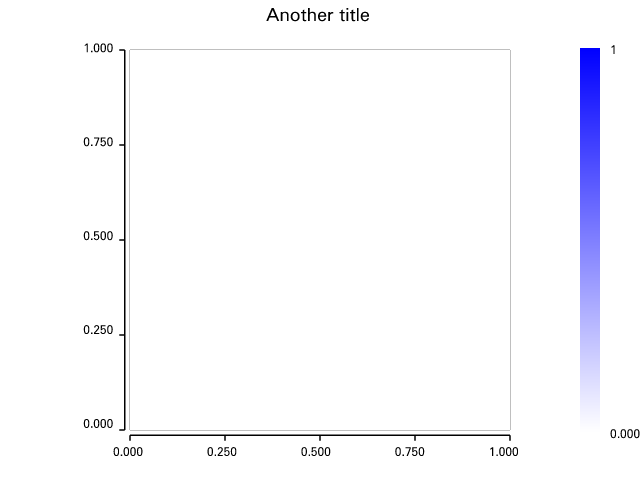

In [40]:
imageTitle = "Another title"
propertyList = {"margin" : 50, "rulers" : True, "rulerticks" : 5, "tick3" : 0.0}
figZ = glucifer.Figure(title=imageTitle, properties=propertyList, quality=3)
surf = glucifer.objects.Surface( mesh, velocityField[0], colours="white blue", valueRange=(0.0001, 1.), 
                                logScale=False)
surf.colourBar.properties = {"margin" : 40, "width" : 20, "align" : "right"}
vArrows = glucifer.objects.VectorArrows( mesh, velocityField, arrowHead=0.2, scaling=0.1)
figZ.append(vArrows)
figZ.append(surf)
figZ.show()